In [1]:
# 导包
from keras.layers import Dense
from keras.layers import Flatten
from keras.datasets import mnist
from keras import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 使python能够正常显示汉字
plt.rcParams["font.sans-serif"] = "SimHei"

In [3]:
# 从MNIST取训练集和测试集
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [4]:
# 对数据归一化
train_x = train_x / 255
test_x = test_x / 255

In [5]:
# 画神经网络
model = Sequential()
# 输入层，将28*28的二维图像展成一维
model.add(Flatten(input_shape=(28, 28)))
# 隐藏层
model.add(Dense(128, activation='relu'))
# 输出层
model.add(Dense(10, activation='softmax'))

In [6]:
# 编译神经网络 优化器是adam，损失函数是分类交叉熵，sparse_categorical_crossentropy不需要转one hot
# Adam优化器的优点
# 实现简单，计算高效，对内存需求少
# 参数的更新不受梯度的伸缩变换影响
# 超参数具有很好的解释性，且通常无需调整或仅需很少的微调
# 更新的步长能够被限制在大致的范围内（初始学习率）
# 能自然地实现步长退火过程（自动调整学习率）
# 很适合应用于大规模的数据及参数的场景
# 适用于不稳定目标函数
# 适用于梯度稀疏或梯度存在很大噪声的问题
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [7]:
# 训练神经网络
model.fit(train_x, train_y,batch_size=32, epochs=10)
# model.save('手写数字识别模型.h5')
# model.load_weights('手写数字识别模型.h5')

Epoch 1/10
1875/1875 [==============================] - 17s 7ms/step - loss: 0.2537 - acc: 0.9267
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1124 - acc: 0.9668
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0762 - acc: 0.9769
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0564 - acc: 0.9829
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0438 - acc: 0.9863
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0346 - acc: 0.9893
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0276 - acc: 0.9913
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0227 - acc: 0.9928
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0172 - acc: 0.9950
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0149 - acc: 0.9955


In [8]:
# 评估模型
loss, accuracy=model.evaluate(test_x,test_y)
print('test loss=',loss,'accuracy=',accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.0809 - acc: 0.9766
test loss= 0.08090569078922272 accuracy= 0.9765999913215637


In [9]:
# 预测
result = model.predict(test_x, batch_size=1)

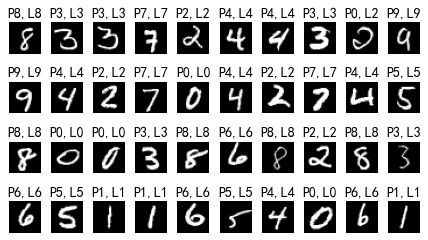

In [10]:
# 查看训练结果 , P代表预测值，L代表标签值
# n为4的倍数
n=4*10
for i in range(n): 
    num = np.random.randint(1, 10000)
    plt.subplot(4, int(n / 4), i + 1)
    plt.axis("off")
    plt.imshow(test_x[num], cmap="gray")
    temp="P" + str(np.argmax(result[num])) + ",L" + str(test_y[num])
    plt.title(temp, fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

In [11]:
def plot_image(image):                   #定义plot_image函数，传入image作为参数    
    fig=plt.gcf()                        #设置显示图形的大小
    fig.set_size_inches(1,1)
    plt.imshow(image,cmap='binary')      #使用plt.show显示图形，传入参数image是28x28的图形，cmap参数设置为binary，以黑白灰度显示
    plt.show()                           #开始绘图

In [ ]:
# 找茬
for i in range(len(result)):
    if(np.argmax(result[i]) != test_y[i]):
        print('↓预测值：',np.argmax(result[i]),'，标签值：',test_y[i])
        plot_image(test_x[i])